In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
df = pd.read_excel("./WNT-性能分析综合.xlsx")
df

,Unnamed: 0,id,Unnamed: 2,Cohort,Subtypes_three,分对次数,Age,T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x,T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x,T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x,...,T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x,T1E_lbp-2D_glrlm_RunLengthNonUniformity_x,T2_log-sigma-1-mm-3D_gldm_LowGrayLevelEmphasis_x,T1E_log-sigma-5-mm-3D_firstorder_90Percentile_x,T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x,T2_wavelet-HHL_glcm_SumSquares_x,T2_wavelet-HHL_glrlm_GrayLevelNonUniformityNormalized_x,T2_wavelet-LLH_gldm_DependenceNonUniformity_x,T2_original_shape_Maximum3DDiameter_y,T2_original_glszm_LargeAreaEmphasis_y
0,0,465600,1.0,1,1,NaN,0.075472,0.261382,0.232460,0.154334,...,0.047558,0.066808,0.155074,0.126483,0.397749,0.424644,0.001137,0.048076,0.297438,0.031032
1,1,483736,1.0,1,1,NaN,0.056604,0.212473,0.186961,0.211377,...,0.120895,0.124990,0.115870,0.261815,0.278936,0.434861,0.005359,0.111334,0.254137,0.129940
2,3,486186,1.0,1,2,NaN,0.528302,0.148827,0.180021,0.251111,...,0.086132,0.095418,0.102116,0.342348,0.413326,0.428018,0.000625,0.029078,0.152401,0.035062
3,4,486675,1.0,1,1,NaN,0.056604,0.197104,0.223250,0.155519,...,0.082033,0.085501,0.157018,0.172676,0.305001,0.450212,0.002330,0.079977,0.259582,0.099090
4,5,486872,1.0,1,2,NaN,0.245283,0.155729,0.113146,0.323643,...,0.221339,0.154184,0.294964,0.079145,0.098996,0.479520,0.004074,0.097524,0.209946,0.064545
5,6,487450,1.0,1,1,NaN,0.094340,0.214751,0.220392,0.157219,...,0.092268,0.084293,0.191877,0.214984,0.370052,0.413132,0.007040,0.075761,0.216084,0.075340
6,7,487681,1.0,1,1,NaN,0.037736,0.097624,0.105486,0.321952,...,0.203327,0.075198,0.283682,0.222342,0.037669,0.501979,0.002454,0.065930,0.157439,0.040028
7,8,488311,1.0,1,0,NaN,0.226415,0.132017,0.116261,0.335176,...,0.228558,0.105163,0.144674,0.178729,0.083171,0.506145,0.000641,0.071158,0.177457,0.047257
8,9,488972,1.0,1,1,NaN,0.150943,0.259143,0.234281,0.169747,...,0.079433,0.080045,0.222527,0.183069,0.232782,0.459893,0.005576,0.060991,0.182552,0.046339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [59]:
radiomic_names = df.columns[7:]
radiomic_names

Index(['T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x',
       'T1E_log-sigma-3-mm-3D_glcm_Autocorrelation_x',
       'T1E_log-sigma-1-mm-3D_glcm_ClusterShade_x',
       'T1E_wavelet-LHL_firstorder_Mean_x',
       'T2_wavelet-LLH_glcm_ClusterShade_y',
       'T1E_log-sigma-5-mm-3D_glrlm_LowGrayLevelRunEmphasis_x',
       'T1E_wavelet-HLL_firstorder_Median_x',
       'T1E_wavelet-LHL_firstorder_Median_x',
       'T2_wavelet-HHL_firstorder_Skewness_x',
       'T1E_log-sigma-3-mm-3D_glrlm_LongRunLowGrayLevelEmphasis_x',
       'T1E_lbp-2D_glrlm_RunLengthNonUniformity_x',
       'T2_log-sigma-1-mm-3D_gldm_LowGrayLevelEmphasis_x',
       'T1E_log-sigma-5-mm-3D_firstorder_90Percentile_x',
       'T1E_log-sigma-3-mm-3D_glszm_LowGrayLevelZoneEmphasis_x',
       'T2_wavelet-HHL_glcm_SumSquares_x',
       'T2_wavelet-HHL_glrlm_GrayLevelNonUniformityNormalized_x',
       'T2_wavelet-LLH_gldm_DependenceNonUniformity_x',
       'T2_original_shape_Maximum3DDiameter_y',
       'T2

In [32]:
df_WNT = df[df["Subtypes_three"]==0]
df_WNT = df_WNT[df_WNT["Cohort"]!=4]

df_G34 = df[df["Subtypes_three"]==1]

df_SHH = df[df["Subtypes_three"]==2]

#pd.set_option('display.max_rows', None) 
df_WNT

In [108]:
from scipy.stats import gaussian_kde
#Example: 
#calcualte the density function
kde = gaussian_kde(df_WNT["T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x"])

#calculate the responding density of cohort 4
WNT_cohort4 = df[df["Subtypes_three"]==0]
WNT_cohort4 = WNT_cohort4[WNT_cohort4["Cohort"]==4]

x_value = WNT_cohort4["T1E_log-sigma-3-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis_x"]
density_value = kde(x_value)
ids = WNT_cohort4["id"]
ids

649    812303
650    806199
659    810031
666    804828
679    815423
680    814627
687    818186
Name: id, dtype: object

In [61]:
from adjustText import adjust_text

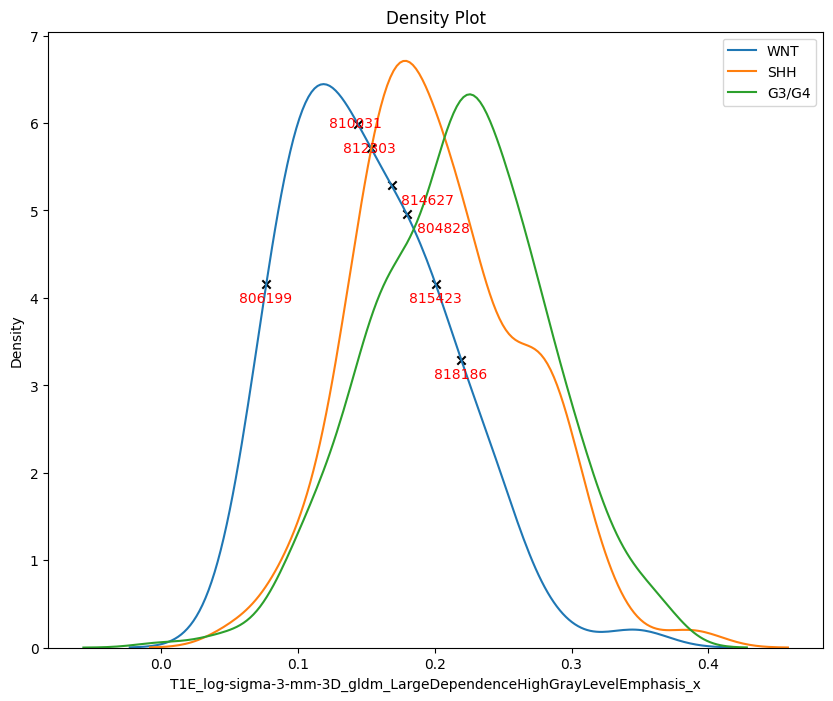

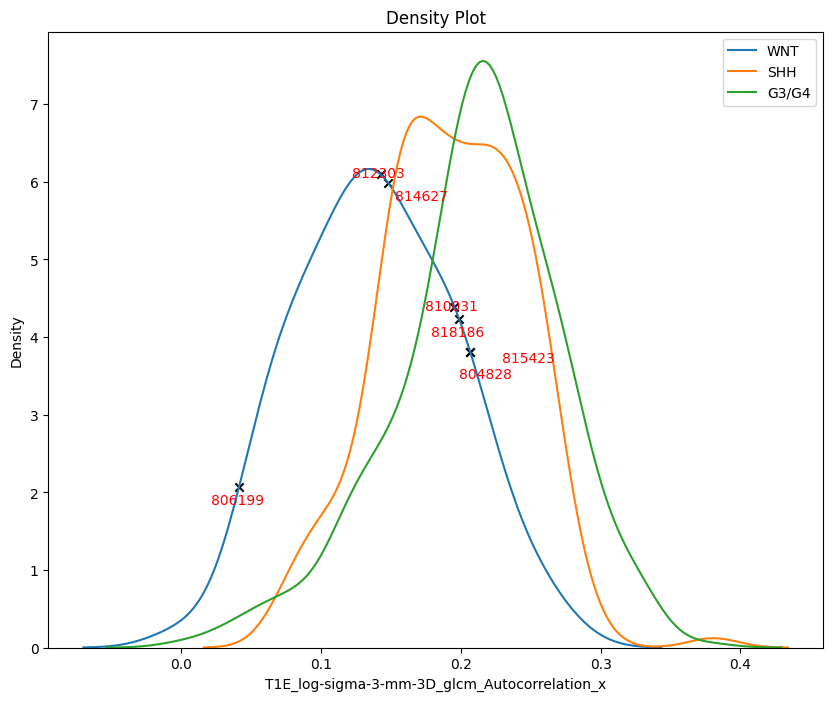

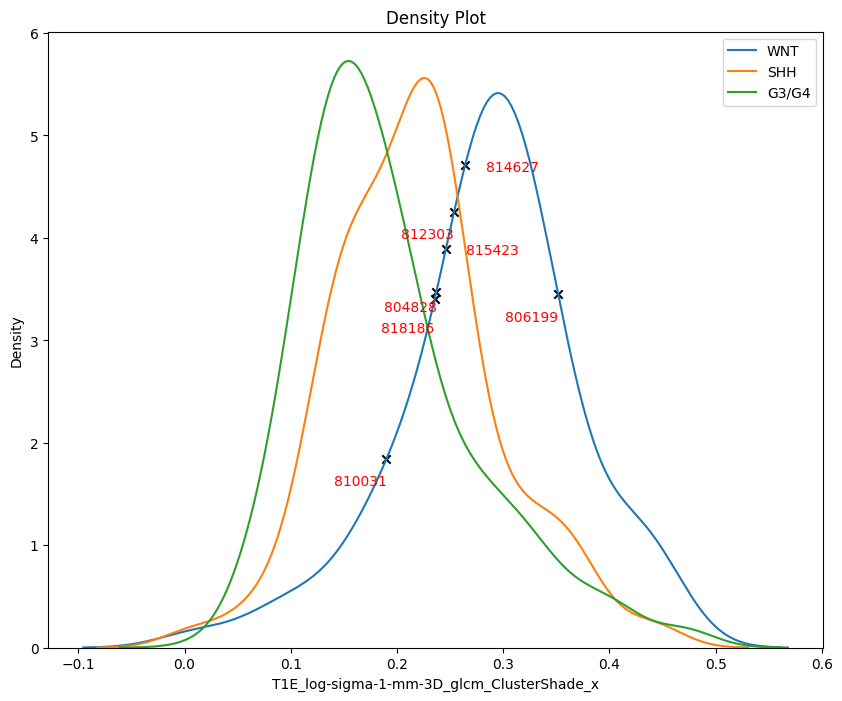

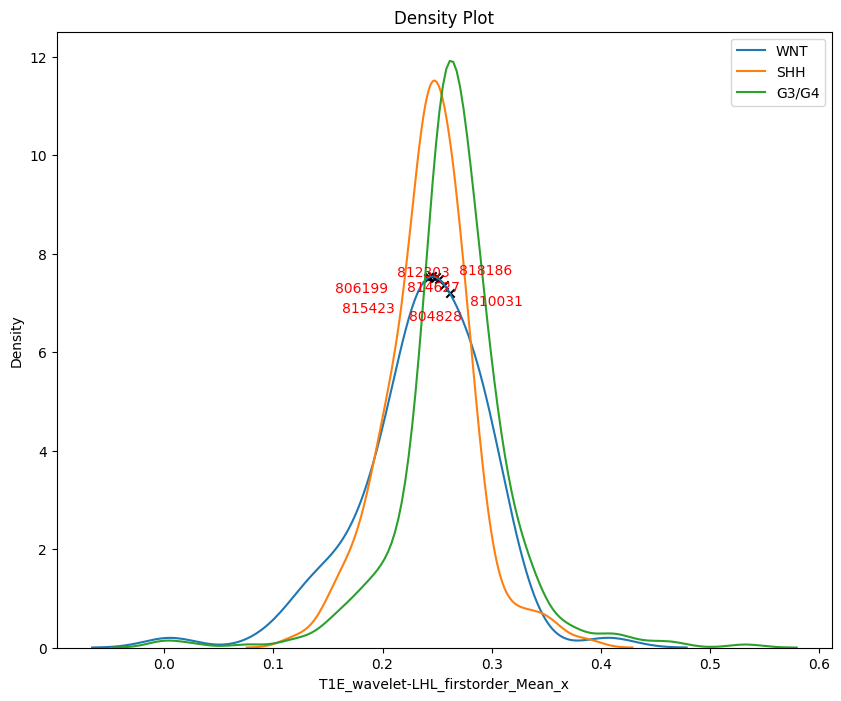

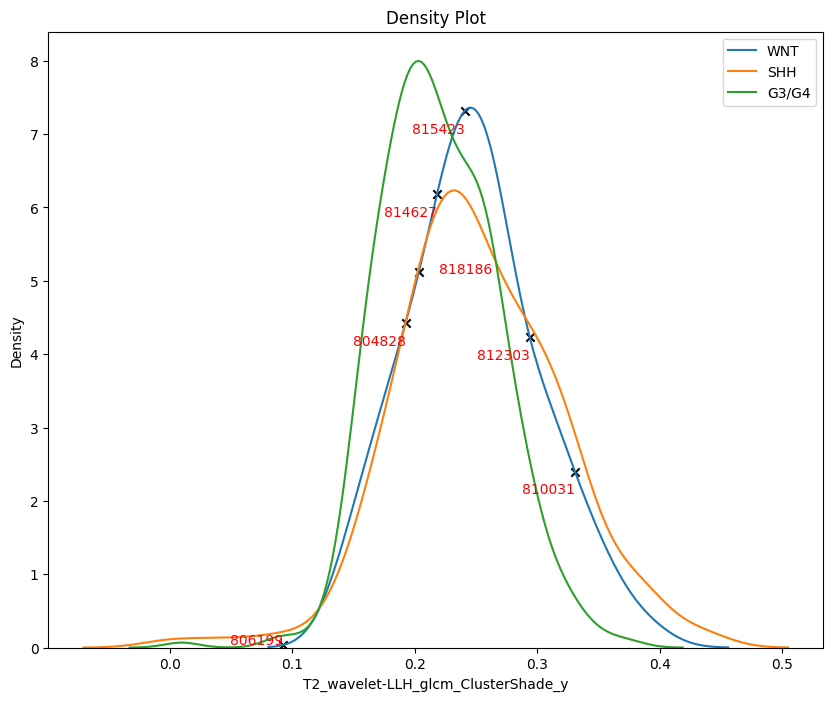

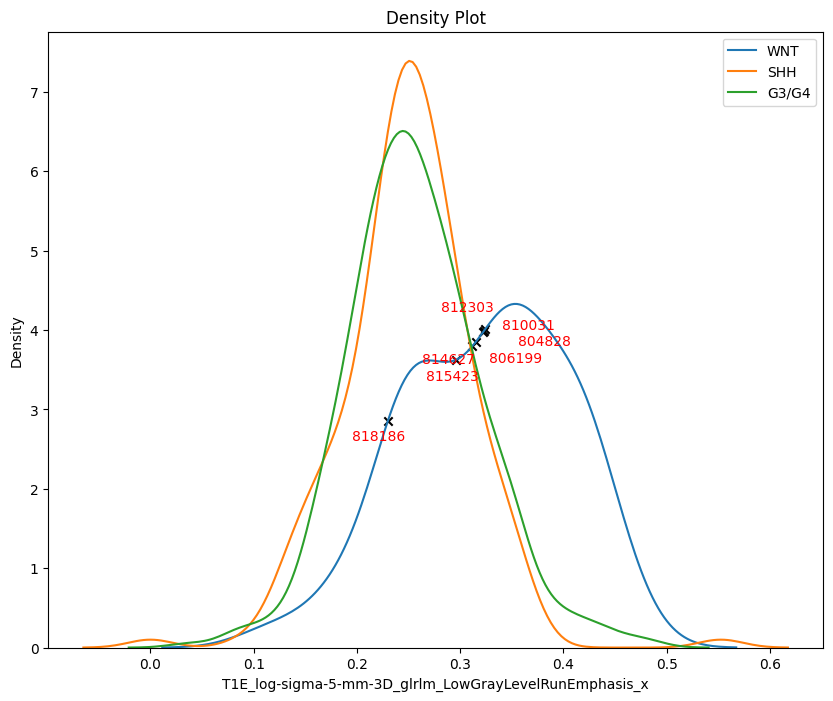

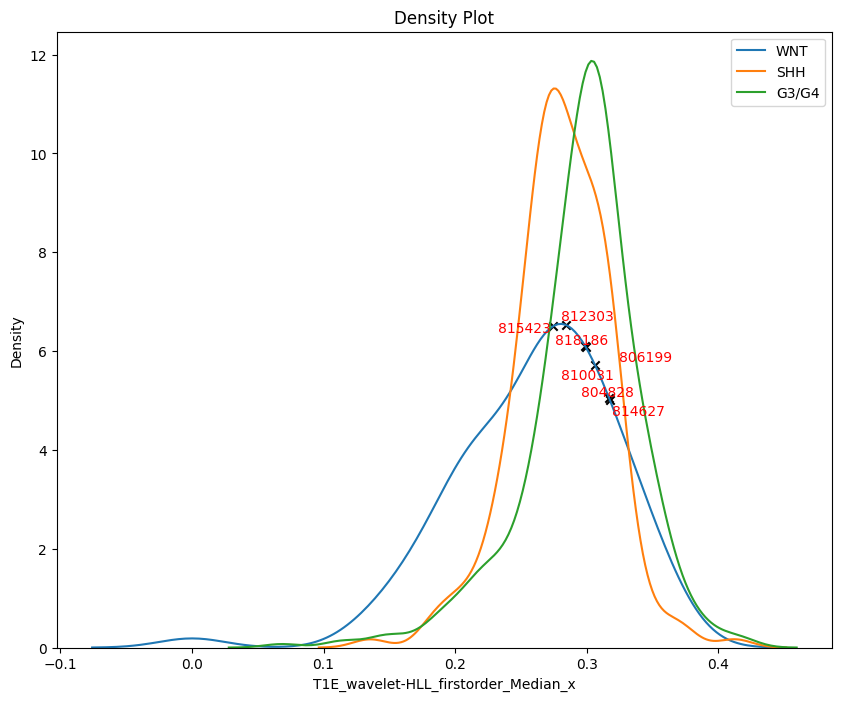

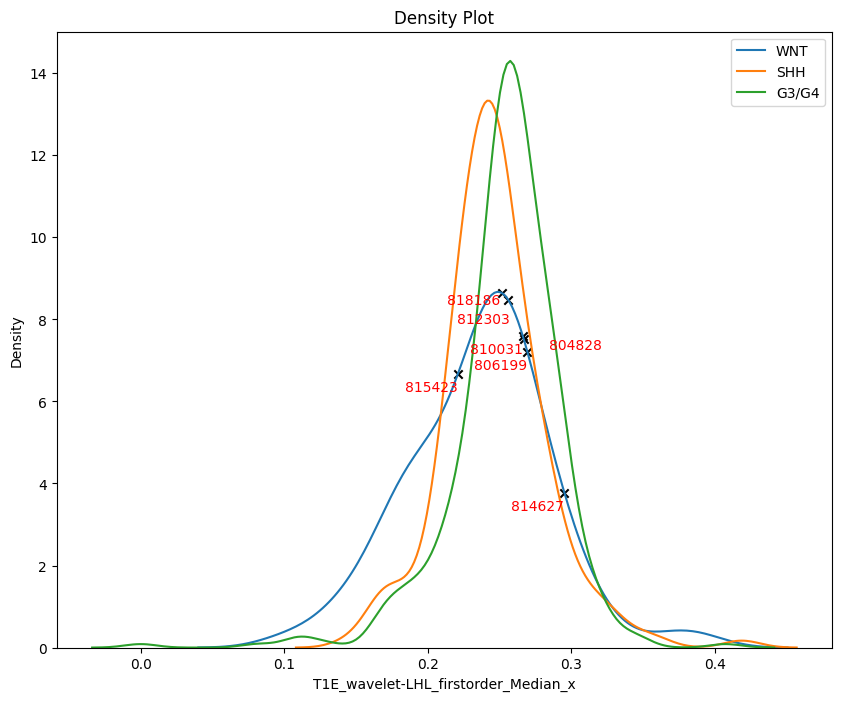

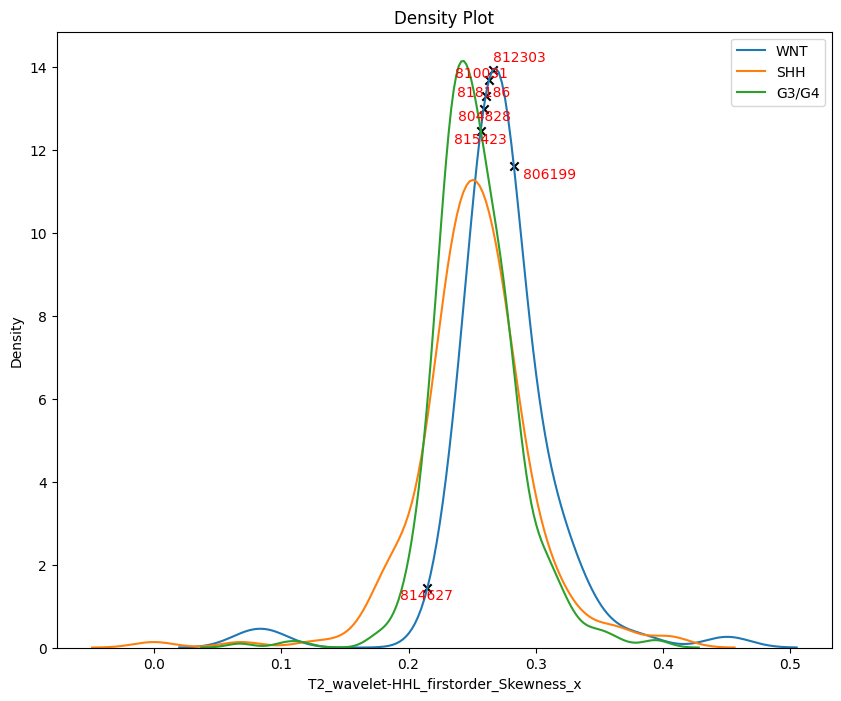

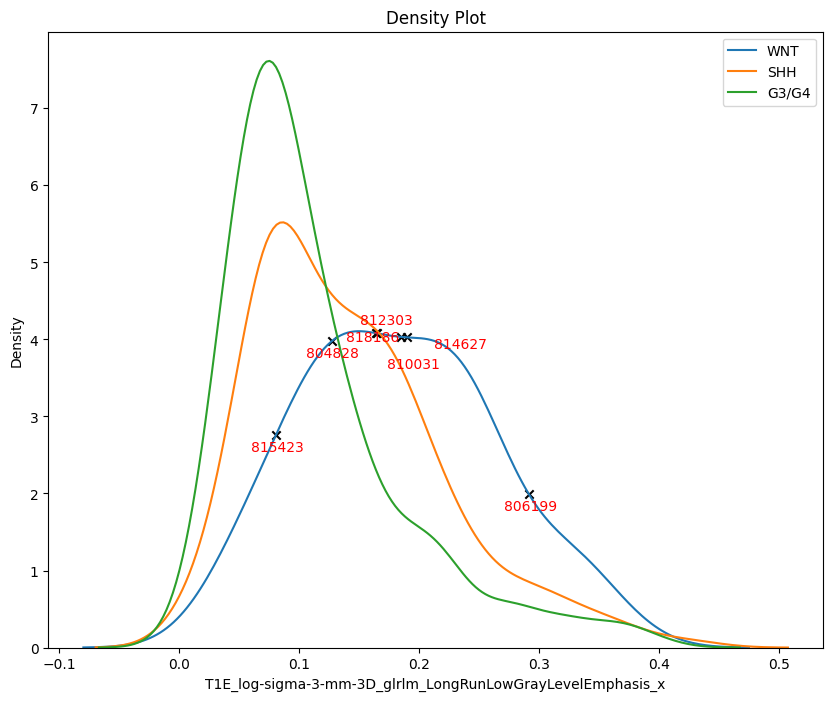

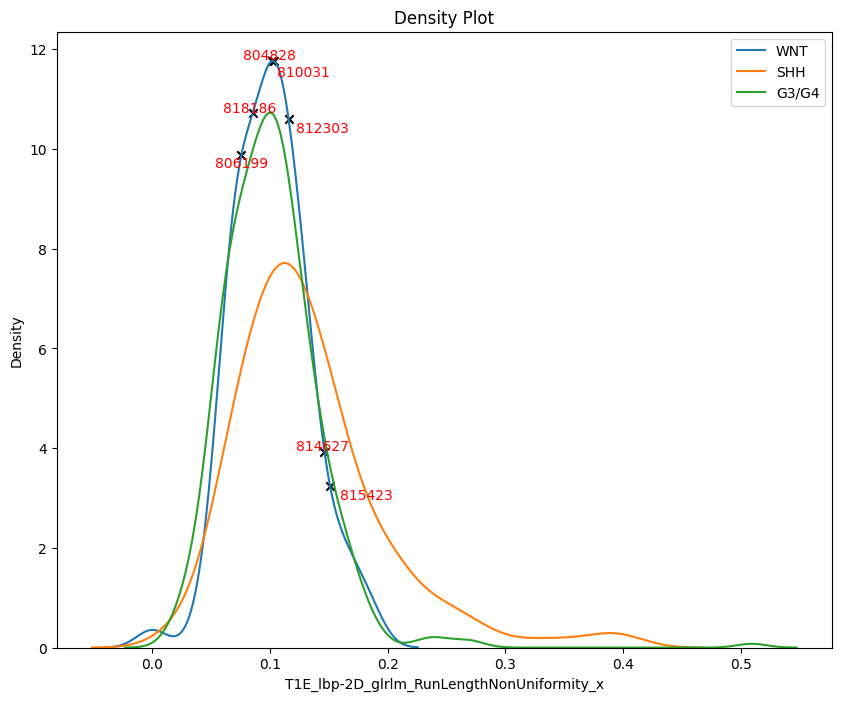

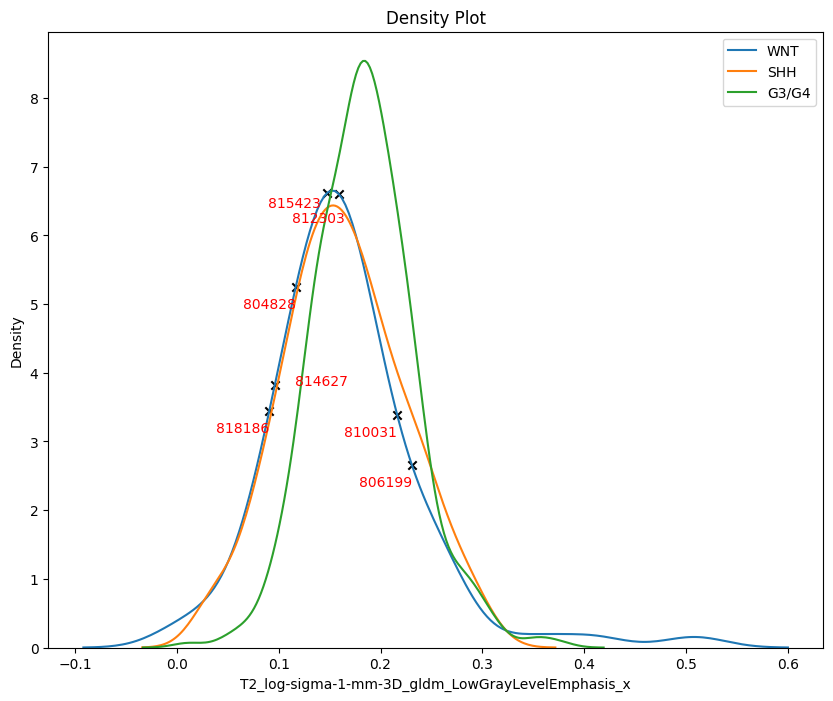

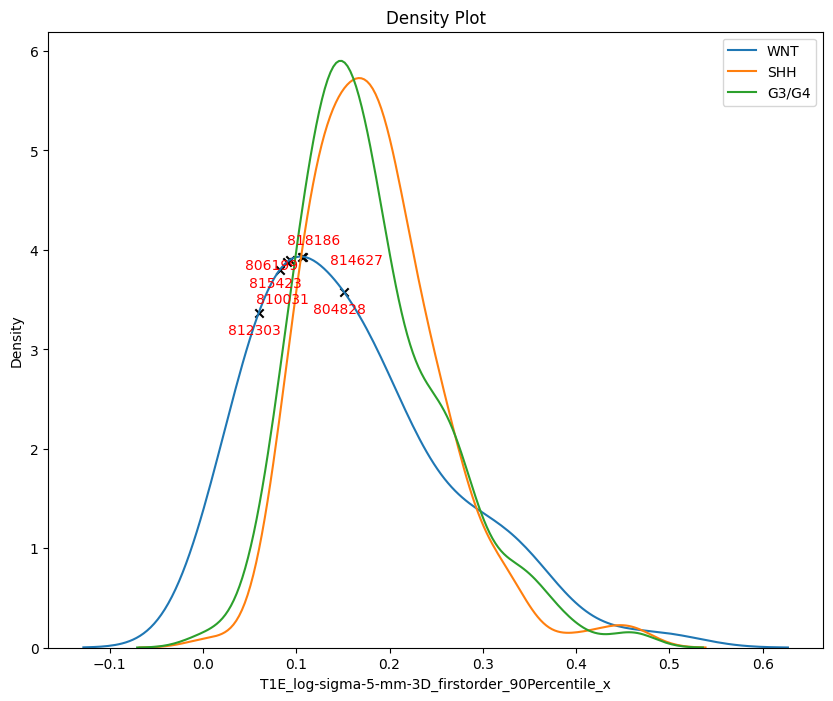

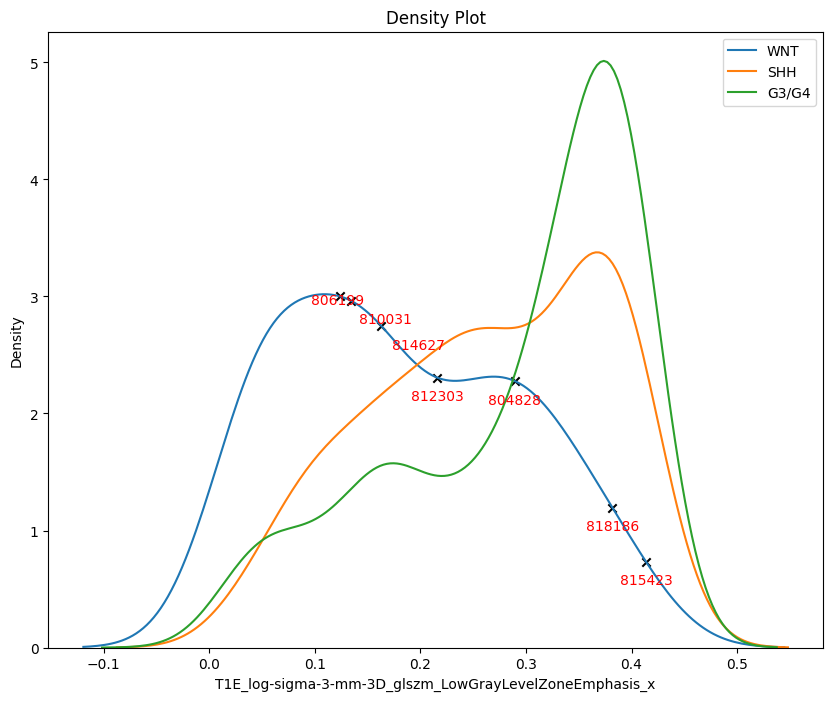

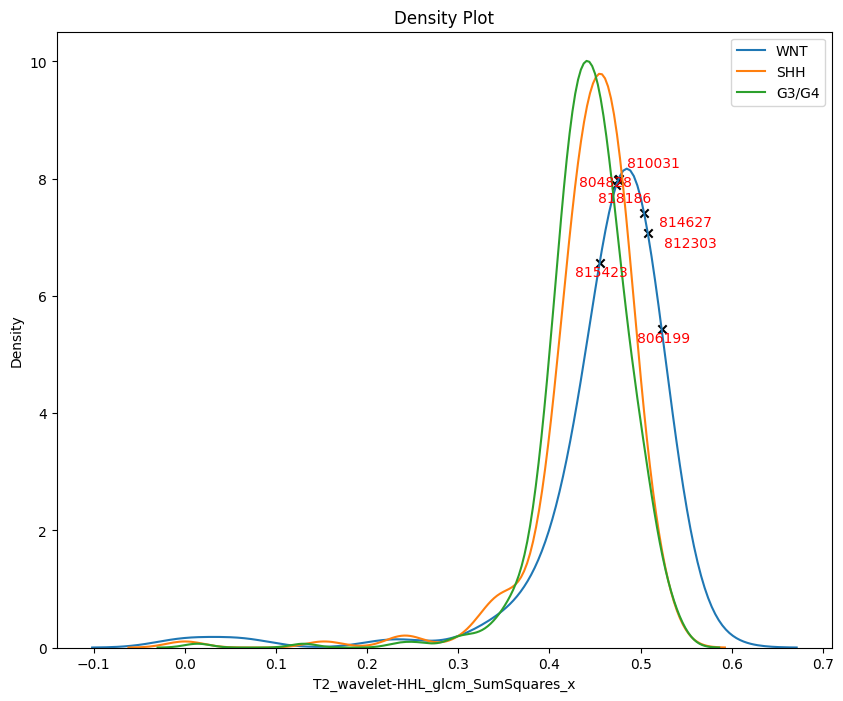

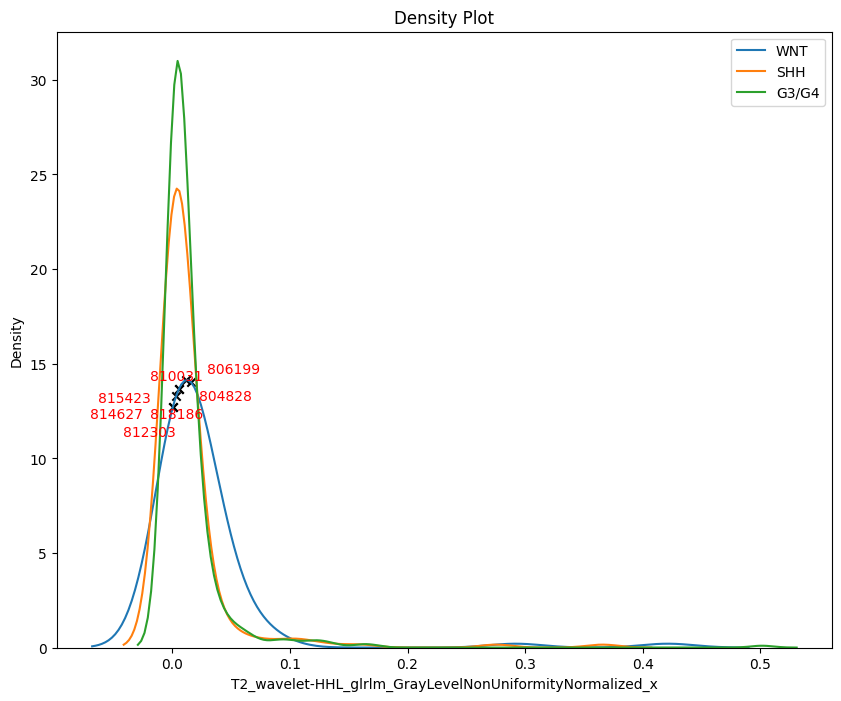

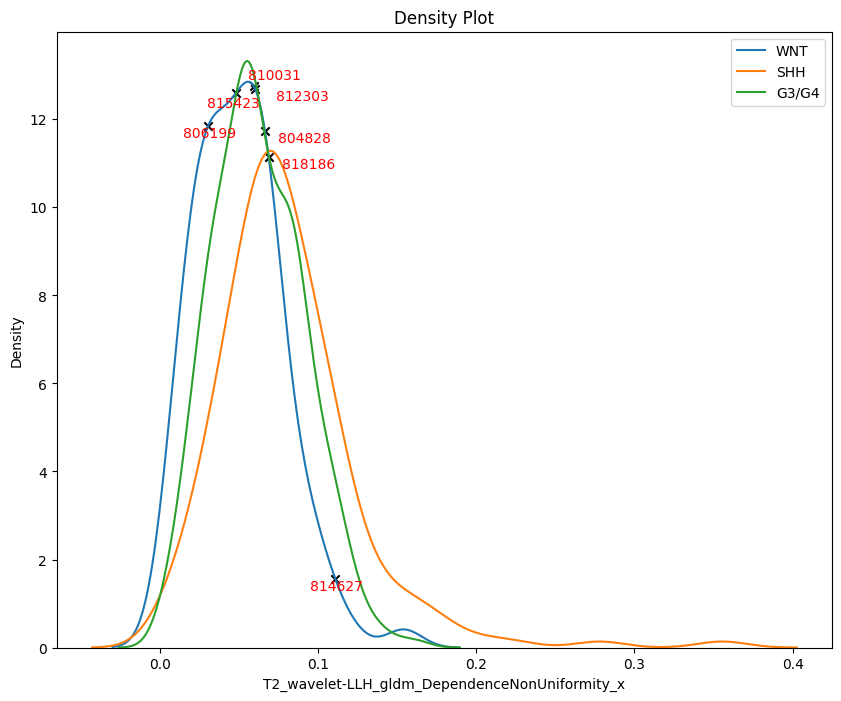

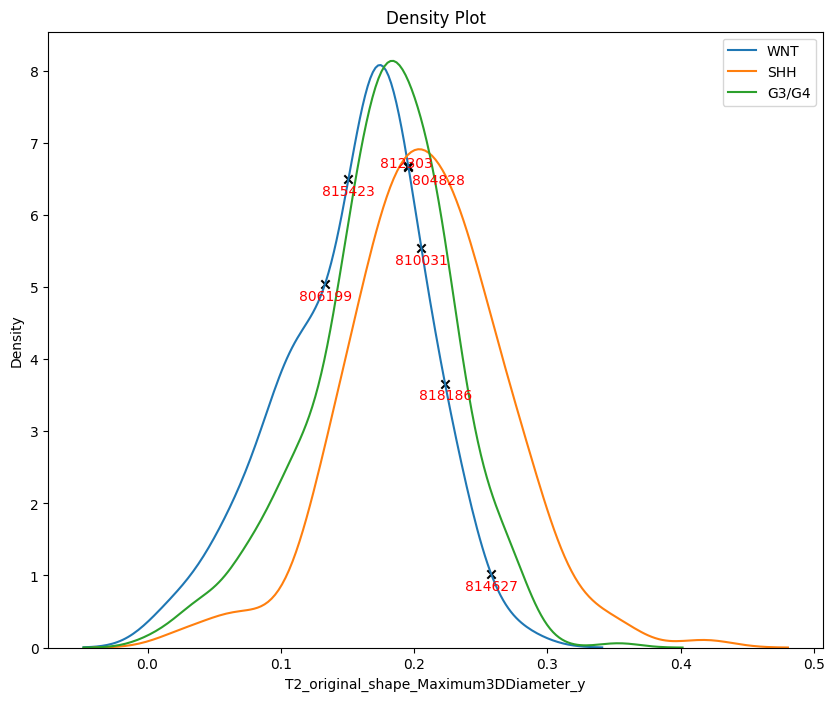

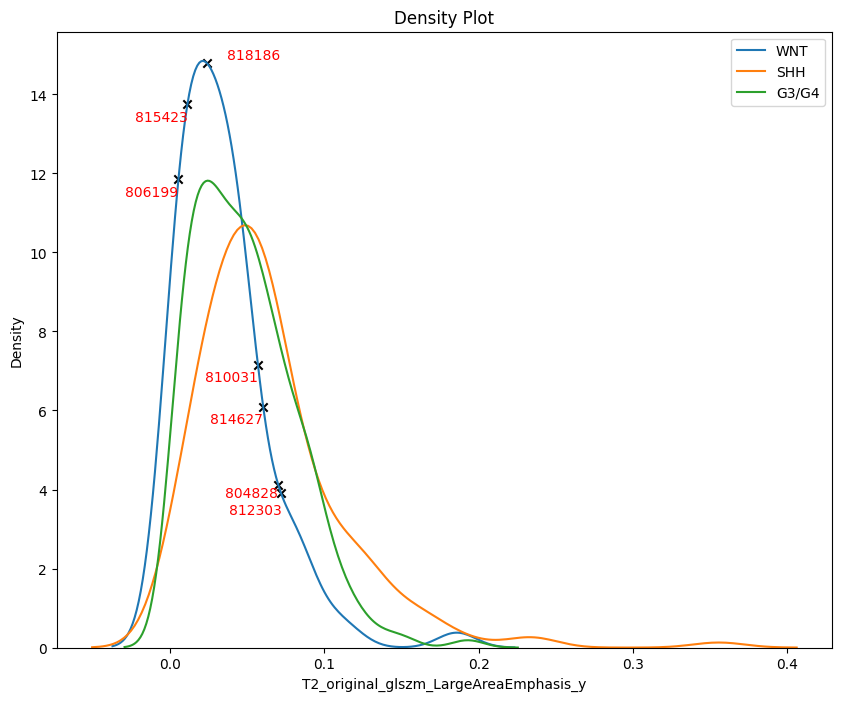

In [114]:
for feature in radiomic_names:
    kde = gaussian_kde(df_WNT[feature])

    x_value = WNT_cohort4[feature]
    density_value = kde(x_value)

    plt.figure(figsize=(10, 8))
    sns.kdeplot(df_WNT[feature], fill=False, label="WNT")
    sns.kdeplot(df_SHH[feature], fill=False, label ="SHH")
    sns.kdeplot(df_G34[feature], fill=False, label ="G3/G4")

    plt.scatter(x_value, density_value, color='black', marker="x")

    texts = []
    for x,density,ID in zip(x_value, density_value, ids):
        texts.append(plt.text(x, density-0.15, ID, 
                              verticalalignment='bottom',
                              color='red'))

    adjust_text(texts)
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(feature)
    plt.ylabel('Density')

    figure_name = os.path.join('./density_curve',f"{feature}.png")
    plt.savefig(figure_name)

Text(100.84722222222221, 0.5, 'Density')

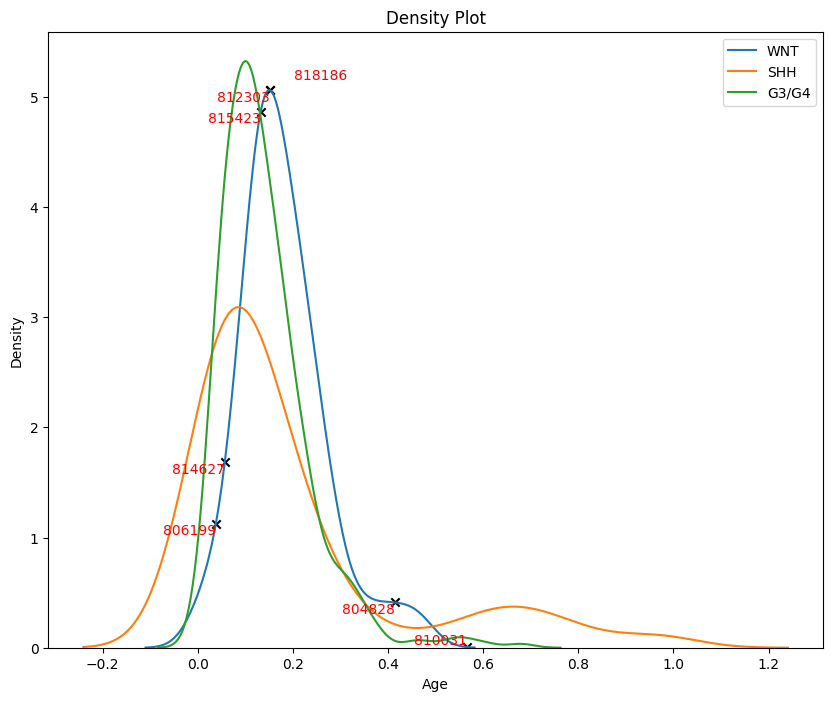

In [129]:
kde = gaussian_kde(df_WNT["Age"])
x_value = WNT_cohort4["Age"]
density_value = kde(x_value)

plt.figure(figsize=(10, 8))
sns.kdeplot(df_WNT["Age"], fill=False, label="WNT")
sns.kdeplot(df_SHH["Age"], fill=False, label ="SHH")  
sns.kdeplot(df_G34["Age"], fill=False, label ="G3/G4")
plt.scatter(x_value, density_value, color='black', marker="x")
texts = []
for x,density,ID in zip(x_value, density_value, ids):
    texts.append(plt.text(x, density, ID, 
                              verticalalignment='bottom',
                              color='red'))
        
adjust_text(texts)
plt.legend()
plt.title('Density Plot')
plt.xlabel("Age")
plt.ylabel('Density')

In [116]:
df["Subtypes_three"].replace(0, "WNT", inplace=True)
df["Subtypes_three"].replace(1, "G3/G4", inplace=True)
df["Subtypes_three"].replace(2, "SHH", inplace=True)

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_2836/3712650431.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Subtypes_three"], y=df["Age"],palette={"WNT":"orange", "SHH":"red", "G3/G4":"blue"})


Text(0, 0.5, '')

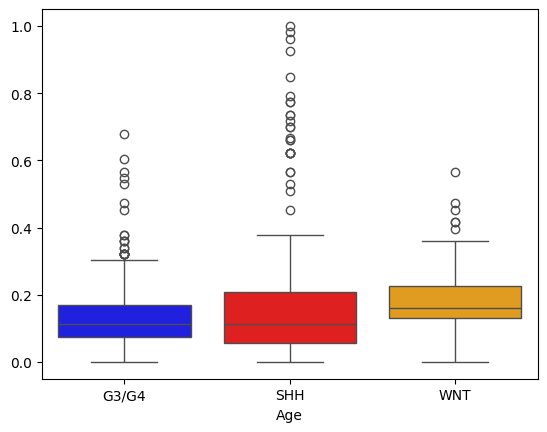

In [127]:
sns.boxplot(x=df["Subtypes_three"], y=df["Age"],palette={"WNT":"orange", "SHH":"red", "G3/G4":"blue"})
plt.xlabel("Age")
plt.ylabel('')

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_2836/2908693157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Subtypes_three"], y=df[feature],
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_2836/2908693157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Subtypes_three"], y=df[feature],
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_2836/2908693157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Subtypes_three"], y=df[feature],
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/

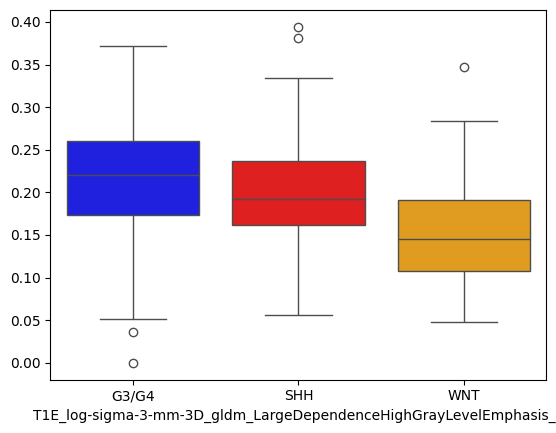

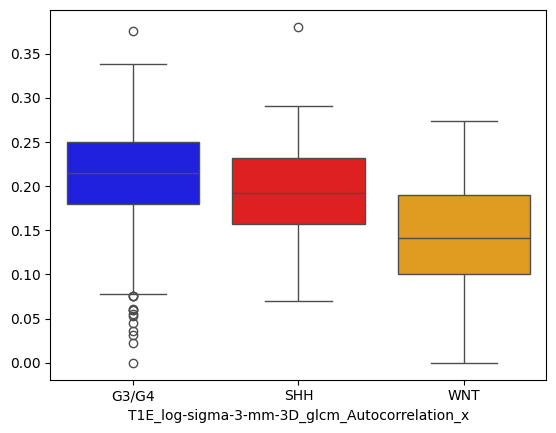

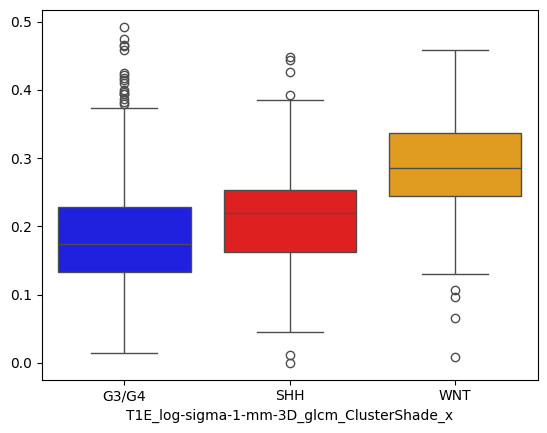

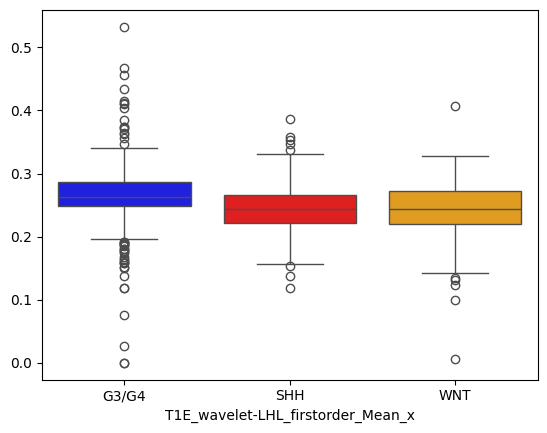

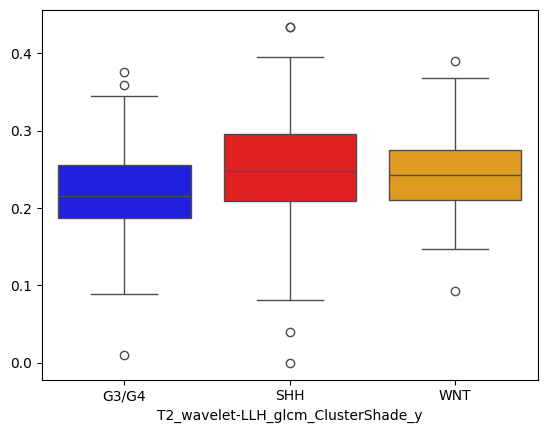

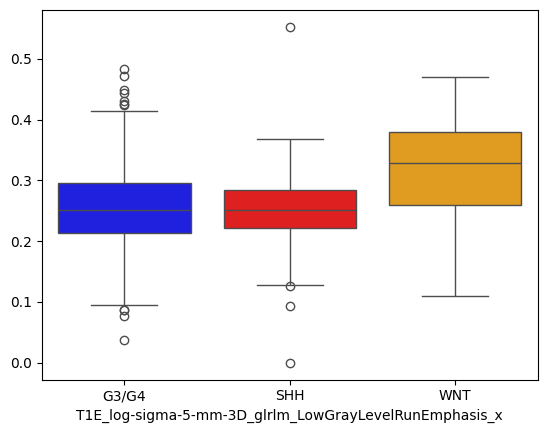

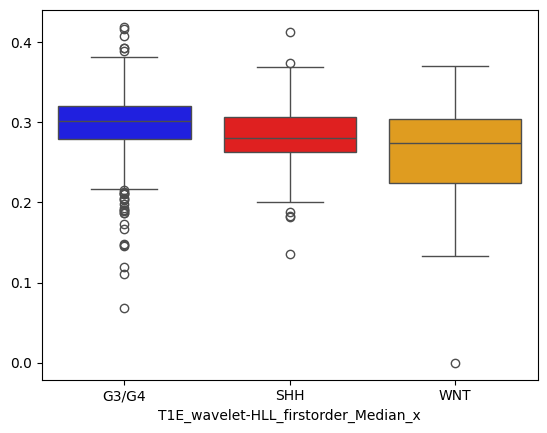

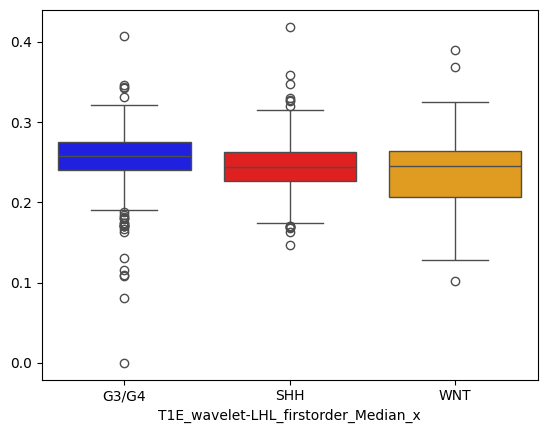

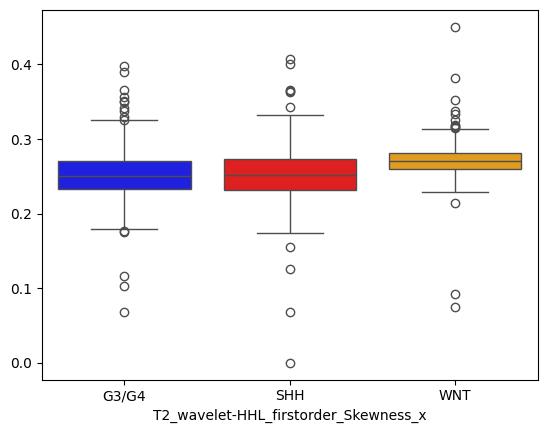

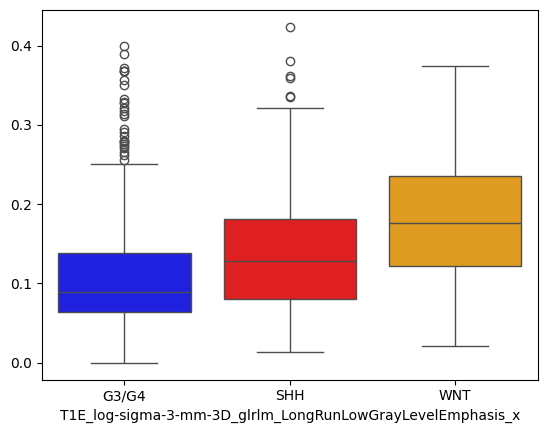

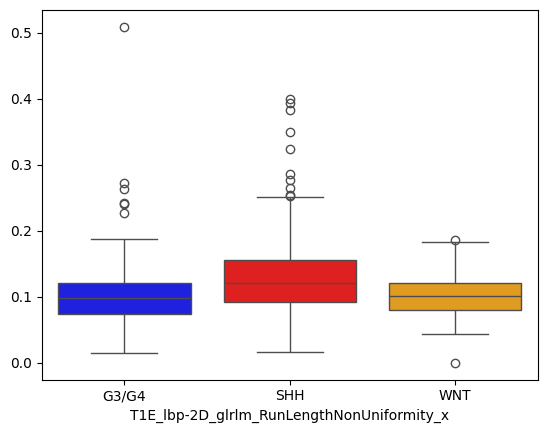

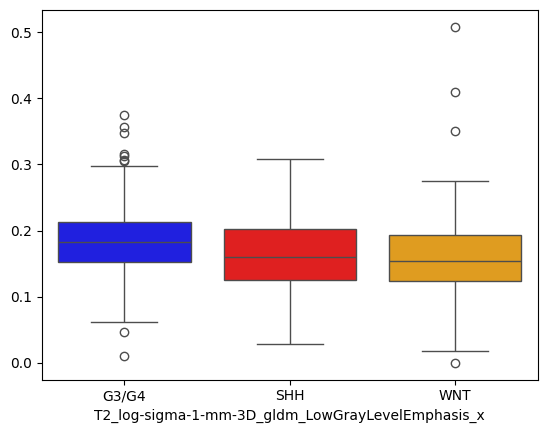

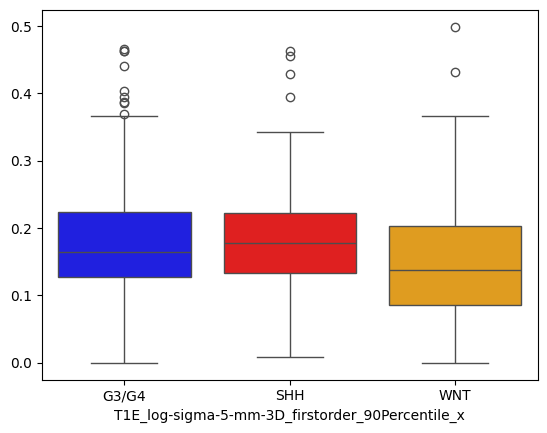

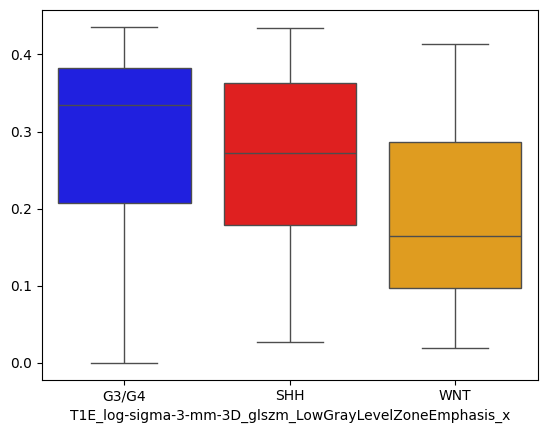

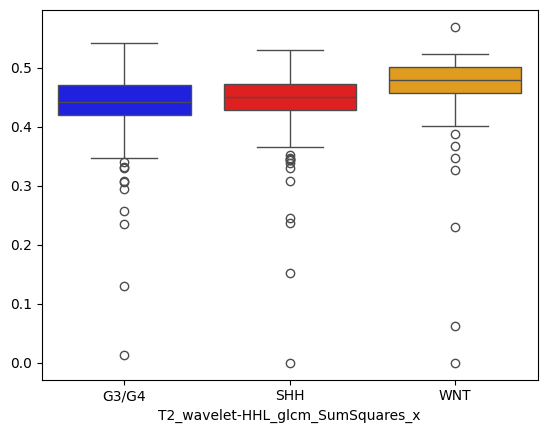

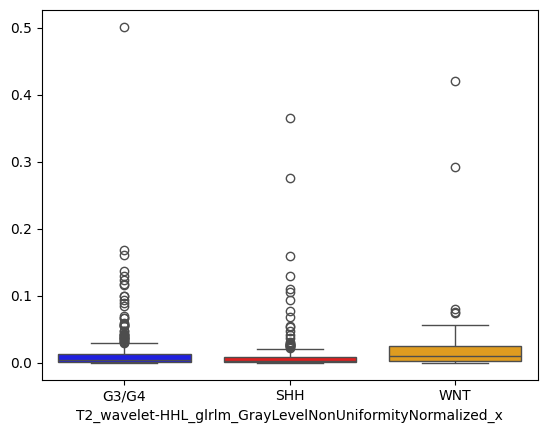

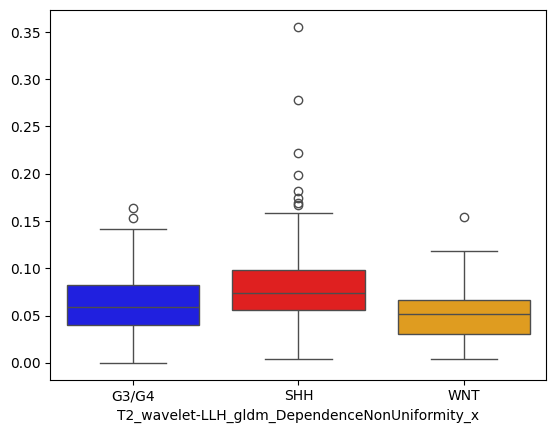

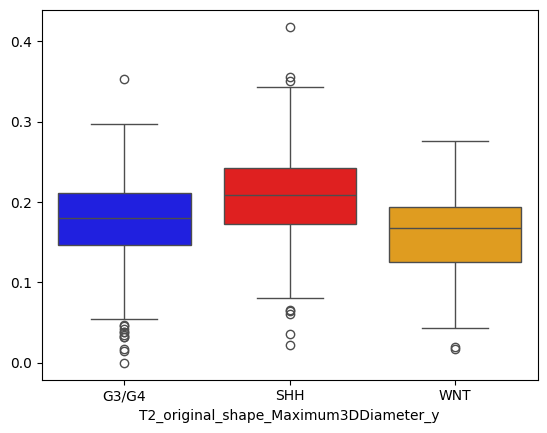

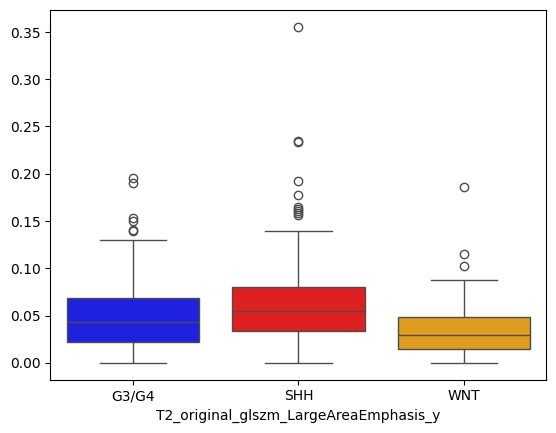

In [126]:

import os
for i,feature in zip(range(19),radiomic_names):

    plt.figure()   
    sns.boxplot(x=df["Subtypes_three"], y=df[feature],
            palette={"WNT":"orange", "SHH":"red", "G3/G4":"blue"}
            )

    plt.xlabel(feature)
    plt.ylabel('')

    figure_name = os.path.join('./box_plot',f"{feature}.png")
    plt.savefig(figure_name)
    